In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('./data/train.csv')
data_exam = pd.read_csv('./data/test.csv')

### Функции очистки данных

In [4]:
def clear_healthcare(ds):
    return ds.drop(columns=['Healthcare_1'], axis=1)

In [5]:
def clear_houseyear(ds):
    rows_to_clear = ds.loc[(ds.HouseYear < 1900) | (ds.HouseYear > 2020)]
    df_valid = ds.loc[(ds.HouseYear >= 1900) | (ds.HouseYear <= 2020)]
    max_year = df_valid.HouseYear.max()
    min_year = df_valid.HouseYear.min()

    for index, row in rows_to_clear.iterrows():
        sqr_delta = row.Square / row.Rooms
        year = ds.loc[(df_valid.Id != row.Id) & 
                        (df_valid.DistrictId == row.DistrictId) & 
                        (df_valid.Rooms == row.Rooms) & 
                        (df_valid.Square <= row.Square + sqr_delta) & (df_valid.Square >= row.Square - sqr_delta)
                       ].HouseYear.mean()

        ds.loc[index, 'HouseYear'] = np.clip(np.int64(year), min_year, max_year)
    
    return ds

### Очистка, разбиение на сеты

In [6]:
data = clear_healthcare(data)
data = clear_houseyear(data)

data_exam = clear_healthcare(data_exam)
data_exam = clear_houseyear(data_exam)

In [7]:
data.Rooms.describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

### Очистка руками

#### Rooms

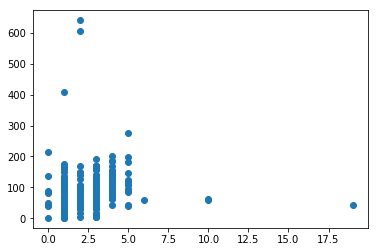

In [8]:
plt_ = plt.scatter(data.Rooms, data.Square)

In [9]:
data.loc[data.Rooms > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [10]:
data.loc[data.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


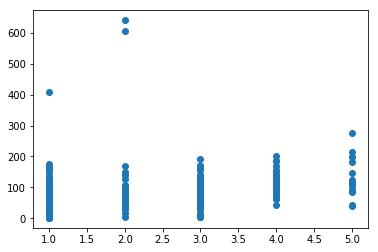

In [11]:
data.loc[377, 'Rooms'] = 2
data.loc[1454, 'Rooms'] = 1
data.loc[2170, 'Rooms'] = 2
data.loc[8849, 'Rooms'] = 2

data.loc[1397, 'Rooms'] = 4
data.loc[1981, 'Rooms'] = 5
data.loc[2269, 'Rooms'] = 1
data.loc[3911, 'Rooms'] = 2
data.loc[4366, 'Rooms'] = 3
data.loc[4853, 'Rooms'] = 1
data.loc[6149, 'Rooms'] = 1
data.loc[4853, 'Rooms'] = 1
data.loc[8834, 'Rooms'] = 3

plt_ = plt.scatter(data.Rooms, data.Square)

-

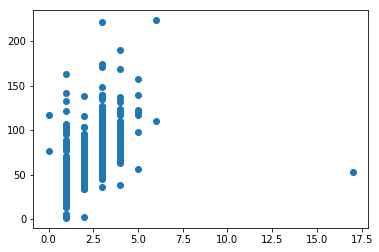

In [12]:
plt_ = plt.scatter(data_exam.Rooms, data_exam.Square)

In [13]:
data_exam.loc[data_exam.Rooms > 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [14]:
data_exam.loc[data_exam.Rooms == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


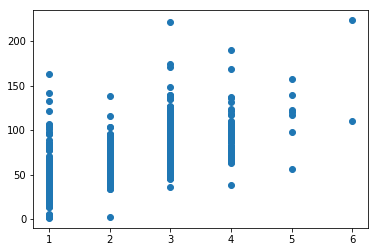

In [27]:
data_exam.loc[3398, 'Rooms'] = 1
data_exam.loc[2406, 'Rooms'] = 3
data_exam.loc[2524, 'Rooms'] = 2
plt_ = plt.scatter(data_exam.Rooms, data_exam.Square)

#### Square

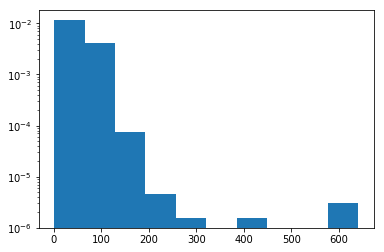

In [16]:
plt_ = plt.hist(data.Square, bins=10, density=True, log='y')

In [17]:
data[data.Square > 350]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [22]:
data[data.Square <= 16]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [18]:
data.loc[4262, 'Square'] = 60.4
data.loc[4690, 'Square'] = 40.9
data.loc[6977, 'Square'] = 64.1

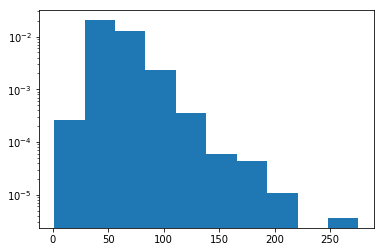

In [19]:
plt_ = plt.hist(data.Square, bins=10, density=True, log='y')

-

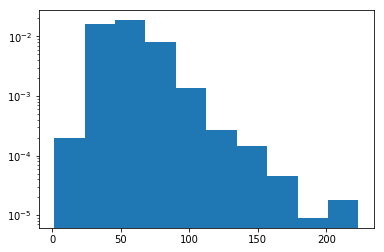

In [20]:
plt_ = plt.hist(data_exam.Square, bins=10, density=True, log='y')

In [21]:
data[data.Square > 180]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
1981,7917,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4487,13434,13,5.0,183.382273,100.985505,15.0,2,6.0,1997,0.090799,B,B,74,19083,2,5,15,B,622888.825328
5087,15947,129,4.0,185.906396,84.830074,31.0,5,3.0,2015,0.020741,B,B,24,5613,5,2,5,B,340273.238253
7201,3233,129,4.0,186.692602,87.487080,32.0,3,3.0,2011,0.020741,B,B,24,5613,5,2,5,B,423443.464367
8511,4249,23,5.0,198.930182,123.139863,10.0,1,2.0,2011,0.014073,B,B,2,475,0,0,0,B,345665.209100
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016
